# Aula 12: Regressão Logística
**Objetivo da aula:** ao fim desta aula, o aluno usará regressão logística para fazer classificação de textos e métodos estatísticos para comparar o resultado de classificadores 

In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Exercício 1
*Objetivo: explicar a regressão logística*

Na regressão logística, cada palavra recebe um “peso”. Um peso positivo indica que a palavra tipicamente está presente na classe “positiva”. Um peso negativo indica que a palavra tipicamente está presente na classe “negativa”. Um peso próximo de zero significa que a palavra não deveria ser levada em conta no processo de decisão.

Compare essa ideia com a que está presente em “Naive Bayes”. Que propriedade representa o "peso" em Naive Bayes?

# Exercício 2
*Objetivo: visualizar o resultado de classificadores no problema de detecção de spam*

Nos códigos abaixo, verifique como funciona a API do `LogisticRegression()`.

1. Como os resultados de classificação do classificador logístico se comparam com os do Naive Bayes?
1. Quando executamos novamente o código, temos os mesmos resultados? Por que?
1. Modifique o notebook para corrigir eventuais erros que você tenha encontrado. Como os resultados se modificaram?


In [3]:
df = pd.read_csv('./datasets/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
textos = list(df['text'])
labels = list(df['label'])
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(textos)
X_train, X_test, y_train, y_test = train_test_split(X, labels)

In [5]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(model_lr.classes_)

              precision    recall  f1-score   support

         ham       0.98      0.97      0.98       927
        spam       0.93      0.96      0.95       366

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293

['ham' 'spam']


# Exercício 3
*Objetivo: comparar a relevância de palavras em regressão logística com a encontrada em Naive Bayes*

Nos códigos abaixo, temos uma ideia de como encontrar a relevância de palavras na Regressão Logísitica.

1. Como ela se compara com aquela fornecida usando a frequência de palavras em Naive Bayes?
1. Como ela se compara com aquela fornecida usando a métrica de Chen et al., que implementamos na aula passada, para o caso Naive Bayes?

In [23]:
vocab = vectorizer.vocabulary_
print(model_lr.classes_)
palavras_ham = []
palavras_spam = []
for t in vocab.keys():
    coef = model_lr.coef_[0, vocab[t]]
    if coef<0:
        palavras_ham.append( (-coef, t) )
    else:
        palavras_spam.append( (coef, t) )

['ham' 'spam']


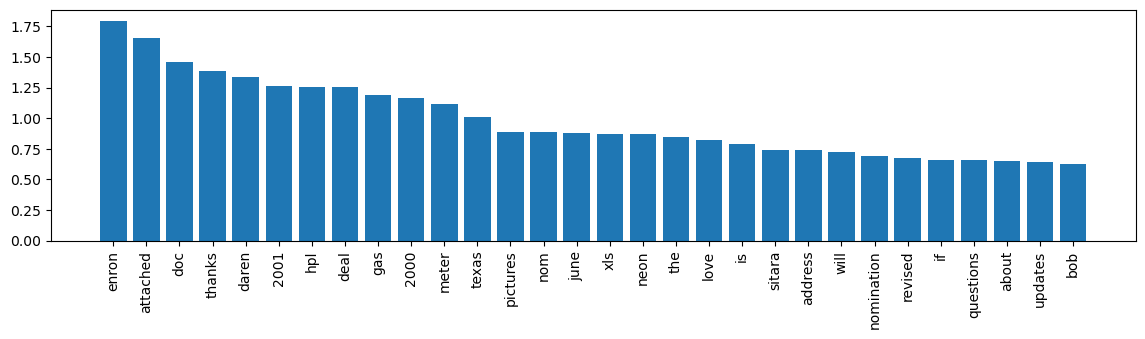

In [24]:
tuplas_ordenadas = sorted(palavras_ham, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 30
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.show()

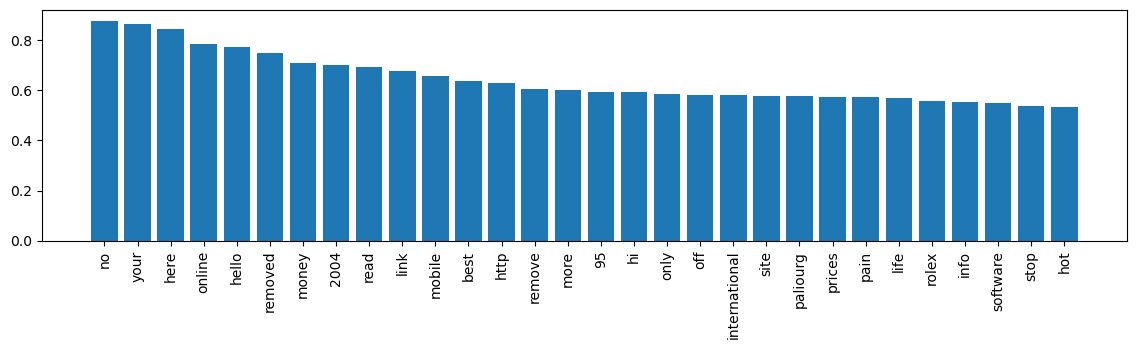

In [25]:
tuplas_ordenadas = sorted(palavras_spam, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 30
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.show()

# Exercício 4
*Objetivo: comparar estatisticamente o desempenho dos classificadores*

1. Como funciona o método “bootstrap”? Como ele poderia ser usado para levantar intervalos de confiança para os classificadores?
1. Implemente o procedimento que você determinou no ítem (a). Se precisar, veja a documentação das métricas de classificação do scikit-learn (https://scikit-learn.org/stable/modules/model_evaluation.html). Qual métrica seria mais adequada, neste caso?
1. Faça uma figura mostrando o desempenho dos classificadores para o spam dataset e também o intervalo de confiança. A figura deve ser completa o suficiente para, se destacada de qualquer texto externo (exceto pelo título, legendo e rótulos dos eixos), ainda assim ser compreensível por uma pessoa não-técnica.


In [26]:
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.84      0.97      0.90       927
        spam       0.89      0.53      0.67       366

    accuracy                           0.85      1293
   macro avg       0.86      0.75      0.78      1293
weighted avg       0.85      0.85      0.84      1293



In [2]:
# Resolva aqui

# Exercício 5
*Objetivo: tomar decisões levando em consideração o desempenho de classificadores*

Compare o desempenho dos classificadores também nos problemas de:

1. Encontrar o teor de sentimento de um review de filme (use o IMDB Dataset)
1. Encontrar o teor de sentimento de um tweet sobre linhas aéreas (use o Twitter Airline Dataset).

Crie uma figura única que mostre o resultado completo dessa comparação de desempenho.

# Exercício 6
*Objetivo: incorporar outros classificadores no processo de comparação*

Com bibliotecas como o Scikit-Learn, o acesso a outros classificadores ficou muito simples - em especial, porque eles passam a usar a mesma API. 

Usando um outro classificador à sua escolha dentre os disponíveis na biblioteca,
1. Estudando o classificador, entenda como ele está realizando a classificação
1. Avalie o desempenho do classificador, incorporando-o na sua figura
1. Repita a operação com outros classificadores. Você consegue encontrar algum paradigma de classificação que gere resultados melhores nestes problemas?
